## Observations and Insights 

#### An observation I made while looking at the boxplot graph is that mice treated with Capomulin and Ramicane had a much lower tumor volume than the mice treated with Infubinol and Ceftamin apart from the outlier in Infubinol's data. You could use this obersavtion to infer that the first two drugs were more effective than the latter two. When looking at the line graph for mouse s185's treatment results, the use of Capomulin was effective for reducing the mouse's tumor size. This helps to support the claim that Capomulin is very effective overall in relation to the other regimens with the exception of Ramicane. The data of the mice treated with Capomulin and their weight and average tumor volume appear to have a strong correlation. You can use the regression line for future mice to see what more normal tumor size would be for a mouse's weight.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn import datasets
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
print(len(data["Mouse ID"].unique()))

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice = data[data.duplicated(["Mouse ID","Timepoint"])]
duplicatemice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupemice = data.loc[data["Mouse ID"] == "g989"]
dupemice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = data.drop(data.loc[data["Mouse ID"]=="g989"].index)

In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(data["Mouse ID"].unique()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
meandf = data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drugdf = pd.DataFrame(meandf)

# Renaming columns to match data description
drugdf = drugdf.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"})

# Adding statistic columns
drugdf["Median Tumor Volume"] = data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drugdf["Tumor Volume Variance"] = data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
drugdf["Tumor Volume Std. Dev."] = data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drugdf["Tumor Volume Std. Err."] = data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
drugdf

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drugdf2 = data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg([('mean'),('median'),('var'),('std'),('sem')])
drugdf2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Unique Mice Tested')

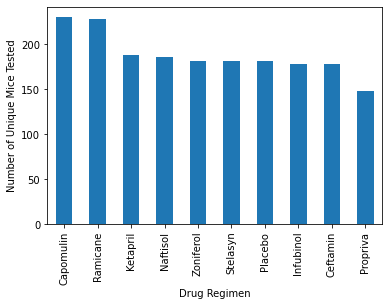

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugcount = data["Drug Regimen"].value_counts()
dc = drugcount.plot(kind='bar')
dc.set_xlabel("Drug Regimen")
dc.set_ylabel("Number of Unique Mice Tested")

Text(0, 0.5, 'Number of Unique Mice Tested')

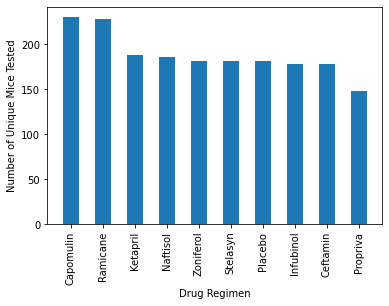

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Turning variable from previous cell into a DF
dcdf = pd.DataFrame(drugcount)

# Saving the name order of the drugs to a variable for bar labels
drugs = dcdf.index.tolist()

# Converting count column in DF to a list
count = dcdf["Drug Regimen"].tolist()

# Plotting graph
plt.bar(drugs,count,width=0.5)
plt.xticks(drugs,rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

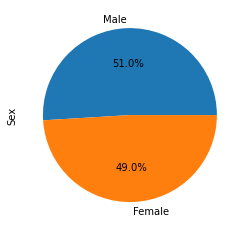

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gendercount = data["Sex"].value_counts()
gc = gendercount.plot(kind="pie",autopct="%1.1f%%")
gc


Text(0.0, 0.45, 'Sex')

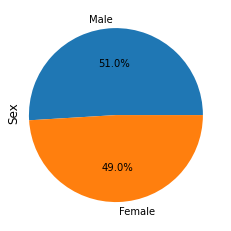

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Turning variable from previous cell into a DF
gcdf = pd.DataFrame(gendercount)

# Saving Male and Female strings as a label list
genders = gcdf.index.tolist()

# Saving counts to a list
gcount = gcdf["Sex"].tolist()

# Plotting graph
plt.pie(gcount,labels=genders,autopct="%1.1f%%")
plt.title("Sex",loc="left",rotation="90",y=0.45)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxdf = data.groupby(["Mouse ID"])["Timepoint"].max()
maxdf.count()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxdatadf = pd.merge(maxdf,data,how="left",on=["Mouse ID","Timepoint"])
maxdatadf.head(20)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Capomulin, Ramicane, Infubinol, Ceftamin = [], [], [], []

# Calculate the IQR and quantitatively determine if there are any potential outliers.   
# Locate the rows which contain mice on each drug and get the tumor volumes
Capomulin = maxdatadf.loc[(maxdatadf["Drug Regimen"] == "Capomulin"),:]["Tumor Volume (mm3)"]
Ramicane = maxdatadf.loc[(maxdatadf["Drug Regimen"] == "Ramicane"),:]["Tumor Volume (mm3)"]
Infubinol = maxdatadf.loc[(maxdatadf["Drug Regimen"] == "Infubinol"),:]["Tumor Volume (mm3)"]
Ceftamin = maxdatadf.loc[(maxdatadf["Drug Regimen"] == "Ceftamin"),:]["Tumor Volume (mm3)"]

# Storing all values in a variable for the boxplot
Regimens = [Capomulin.tolist(), Ramicane.tolist(), Infubinol.tolist(), Ceftamin.tolist()]

# Determine outliers using upper and lower bounds

# Calculating data for Capomulin
caquartiles = Capomulin.quantile([.25,.5,.75])
calowerq, caupperq = caquartiles[0.25], caquartiles[0.75]
caiqr = caupperq-calowerq
calower_bound, caupper_bound = calowerq - (1.5*caiqr), caupperq + (1.5*caiqr)
print(f"Capomulin: {sorted(Regimens[0])}")
print(f"For Capomulin, the IQR is {caiqr}, datapoints below {calower_bound} and above {caupper_bound} could be outliers.")
print("-------------------------------------")
  
# Calculating data for Ramicane    
raquartiles = Ramicane.quantile([.25,.5,.75])
ralowerq, raupperq = raquartiles[0.25], raquartiles[0.75]
raiqr = raupperq-ralowerq
ralower_bound, raupper_bound = ralowerq - (1.5*raiqr), raupperq + (1.5*raiqr)
print(f"Ramicane: {sorted(Regimens[1])}")
print(f"For Ramicane, the IQR is {raiqr}, datapoints below {ralower_bound} and above {raupper_bound} could be outliers.")
print("-------------------------------------")

# Calculating data for Infubinol
inquartiles = Infubinol.quantile([.25,.5,.75])
inlowerq, inupperq = inquartiles[0.25], inquartiles[0.75]
iniqr = inupperq-inlowerq
inlower_bound, inupper_bound = inlowerq - (1.5*iniqr), inupperq + (1.5*iniqr)
print(f"Infubinol: {sorted(Regimens[2])}")
print(f"For Infubinol, the IQR is {iniqr}, datapoints below {inlower_bound} and above {inupper_bound} could be outliers.")
print(f"{sorted(Regimens[2])[0]} is an outlier")
print("-------------------------------------")

# Calculating data for Ceftamin
cequartiles = Ceftamin.quantile([.25,.5,.75])
celowerq, ceupperq = cequartiles[0.25], cequartiles[0.75]
ceiqr = ceupperq-celowerq
celower_bound, ceupper_bound = celowerq - (1.5*ceiqr), ceupperq + (1.5*ceiqr)
print(f"Ceftamin: {sorted(Regimens[3])}")
print(f"For Ceftamin, the IQR is {ceiqr}, datapoints below {celower_bound} and above {ceupper_bound} could be outliers.")

Capomulin: [23.34359787, 28.43096411, 28.48403281, 30.48598484, 31.02392294, 31.896238399999998, 32.37735684, 33.32909778, 34.45529799, 36.04104736, 37.07402422, 37.31184577, 38.125164399999996, 38.75326548, 38.84687569, 38.93963263, 38.98287774, 39.95234669, 40.1592203, 40.65812366, 40.72857787, 41.48300765, 41.58152074, 46.53920617, 47.68596303]
For Capomulin, the IQR is 7.781863460000004, datapoints below 20.70456164999999 and above 51.83201549 could be outliers.
-------------------------------------
Ramicane: [22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575, 31.09533505, 31.56046955, 32.97852192, 33.39765251, 33.56240217, 36.13485243, 36.37451039, 36.56165229, 37.22565033, 37.31123552, 38.34200823, 38.407618299999996, 38.81036633, 40.65900627, 40.66771292, 43.04754260000001, 43.16637266, 43.41938077, 44.18345092, 45.22086888]
For Ramicane, the IQR is 9.098536719999998, datapoints below 17.912664470000003 and above 54.30681135 could be outliers.
---------------------

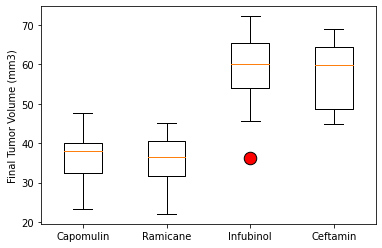

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
red_circle = dict(markerfacecolor='r',marker='o',markersize=12.5)
ax1.boxplot(Regimens,labels=treatments,flierprops=red_circle)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

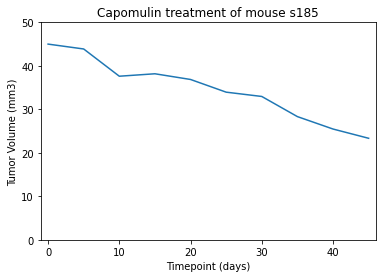

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Gathering data for graph values and saving them to a list
s185x = data.loc[(data["Mouse ID"] == "s185"),:]["Timepoint"].tolist()
s185y = data.loc[(data["Mouse ID"] == "s185"),:]["Tumor Volume (mm3)"].tolist()

# Plotting graph
plt.plot(s185x,s185y)
plt.xlim(-1,46)
plt.ylim(0,50)
plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

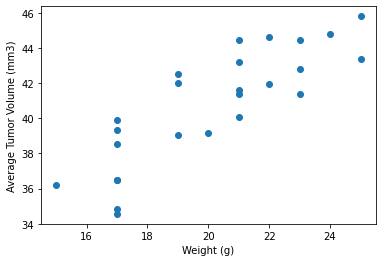

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Gathering data for graph values and saving them to a array
camicey = np.array(data.loc[(data["Drug Regimen"] == "Capomulin"),:].groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"])
camicex = np.array(data.loc[(data["Drug Regimen"] == "Capomulin"),:].groupby(["Mouse ID"]).mean()["Weight (g)"])

# Plotting graph
plt.scatter(camicex,camicey)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between the weight and average tumor size of mice treated with Capomulin is 0.842
The r-squared value is 0.709
The equation for the regression line is y = 0.95x + 21.55


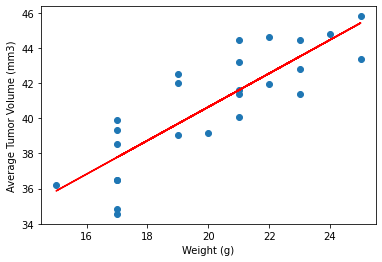

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculating correlation and printing it in a statement
correlation = round(st.pearsonr(camicex,camicey)[0],3)
print(f"The correlation between the weight and average tumor size of mice treated with Capomulin is {correlation}")

# Calculating values needed to determine regression and printing the r^2 value
(slope,intercept,rvalue,pvalue,stderr)=linregress(camicex,camicey)
camicervalues = camicex*slope+intercept
print(f"The r-squared value is {round(rvalue**2,3)}")

# Setting the regression equation to a variable and printing it
camice_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"The equation for the regression line is {camice_equation}")

# Plotting graph along with regression line
plt.scatter(camicex,camicey)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(camicex,camicervalues,"r-")